# The Last Glacial Maximum, ice sheet flow, directional data, and bootstrapping

## Import scientific python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
import cartopy.crs as ccrs

## Ice-flow indicator compilation, British Columbia and Yukon

The data set we will focus on today is a large compilation of indicators of past ice-flow that was published by the British Columbia Geological Survey.

> Publication Information:
*Ice-flow indicator compilation, British Columbia and Yukon
British Columbia Ministry of Energy and Mines, British Columbia Geological Survey Open File 2016-04
Geological Survey of Canada Open File 8083
H. Arnold, T. Ferbey and A.S. Hickin*

> A better understanding of the Cordilleran ice sheet flow history is important for designing, implementing, and interpreting geochemical and mineralogical data from drift prospecting surveys. Building on ice-flow indicator compilations for British Columbia by Ferbey et al. (2013) and Yukon Territory (Lipovsky and Bond, 2014), this map and database illustrate major ice-flow directions for the Canadian sector of Cordilleran ice sheet during the Late Pleistocene.

> The data were derived from published and unpublished surficial geology, terrain, and glacial feature maps. Because field data are sparse in the area ~ 300 km south of the British Columbia -Yukon border, new data were generated using digital stereo airphotos, digital derived-stereo orthophoto mosaics, and digital derived-stereo Satellite Pour l'Observation de la Terre (SPOT) imagery. The raw data are integrated into a single database; no attempt was made to reconcile cases where data from different sources conflict. 

> The integrated database may be downloaded from http://www.empr.gov.bc.ca/Mining/Geoscience/PublicationsCatalogue/OpenFiles/2016/Pages/2016-4.aspx


<font color=goldenrod>**_Code for you to write_**</font>
- Read in the data 'cordillera_ice_directions.csv'

In [2]:
ice_directions = pd.read_csv("data/cordillera_ice_directions.csv")


We can rename columns in pandas using a `dictionary`, which is signified with curly brackets `{ : }`. Dictionaries are used to store data values in {key:value} pairs.

Here, we use the function `rename` and specify the column we want to change.

In [3]:
ice_directions = ice_directions.rename(columns={'Feat': 'Feature', 'Proj': 'Projection'})
ice_directions.head()

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Prjctn,src_Author,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref
0,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.543547,48.336583,230,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"
1,Drumlinoid or fluting,Bidirectional,092B,092B06,NAD 83,Geographic,-123.394746,48.371947,39,NaN,...,Lambert Conformal Conic,"Fulton, R.J.",1995,Surficial materials of Canada,Geological Survey of Canada,A Series Map,1880A,5000000,e00,"Fulton, 1995"
2,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.507599,48.382182,190,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"
3,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.494612,48.396594,188,NaN,...,Universal Transverse Mercator Zone 10 North,"Blyth, H.E. and Rutter, N.W.",1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993"
4,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.496605,48.400974,202,NaN,...,Universal Transverse Mercator Zone 10 North,"Blyth, H.E. and Rutter, N.W.",1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993"


<font color=goldenrod>**_Code for you to write_**</font>
- Rename column `Proj` to `Projection`

In [4]:
ice_directions = ice_directions.rename(columns={"Proj": "Projection"})
ice_directions.columns

Index(['Feature', 'Sense', 'NTS_250k', 'NTS_50k', 'Datum', 'Projection',
       'Long', 'Lat', 'Azimuth', 'Timing', 'Symbol', 'Field_date', 'Comments',
       'src_Featur', 'src_Datum', 'src_Prjctn', 'src_Author', 'src_Year',
       'src_Title', 'src_Org', 'src_Series', 'src_Pub_no', 'src_Scale',
       'src_Type', 'src_Ref'],
      dtype='object')

## How do Earth scientists determine the extent and direction of ice sheet flow?

As covered in the reading, there the presence of ice lead to a number of different types of features. **What types of features are used in this data set? Let's get all the unique values in the 'Feature' column.**

In [5]:
ice_directions['Feature'].unique()

array(['Striation', 'Drumlinoid or fluting', 'Drumlin',
       'Striation or groove', 'Crag-and-tail', 'Fluted bedrock'],
      dtype=object)

## Plotting the direction of one measurement

### Azimuth

Earth science is filled with directional data. The most typical way that directional data are reported is as azimuth:

<img src="./figures/azimuth.png" width = 300>

Let's look at the azimuth of the first data point in the dataset:

In [6]:
ice_directions.head(1)

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Prjctn,src_Author,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref
0,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.543547,48.336583,230,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"


<font color=goldenrod>**_Code for you to write_**</font>

Select the azimuth of the first row in the `ice_directions` dataframe.

In [7]:
first_azimuth= ice_directions.iloc[0]['Azimuth']

In [8]:
np.sin(0)

np.float64(0.0)

## Getting the x length and y length of the unit vector associated with the azimuth

<img src="./figures/Circle_cos_sin.gif" width = 600>

If $\theta=0º$ $sin(\theta)=1$ and $cos(\theta)=0$

If $\theta=90º$ $sin(\theta)=0$ and $cos(\theta)=1$

If $\theta=225º$ $sin(\theta)= -0.7071$ and $cos(\theta)= -0.7071$

Unfortunately, the trignometric convention is rotated 90º from the geographic convention, but the result is that:

x_length = sin(azimuth)

y_length = cos(azimuth)

<img src="./figures/2D_Direction_Vectors.svg" width = 600>


<font color=red>**_Discussion Question_**</font>

How would you write a function called `get_arrow_lengths` that calculates the x and y lengths given an input azimuth?
- Arguments passed in?
- Process? Do we need to change units?
- Variables returned out?

<font color=goldenrod>**_Code for you to write_**</font>

Define a function called `get_arrow_lengths` that calculates the x and y lengths given an input azimuth:

Thanks you'll need:
1. read in the `azimuth` argument
2. convert from `azimuth` in degrees to `azimuth_radians` using the `np.radians` function
3. define variables `x_length` and `y_length` using `np.sin` and `np.cos`
4. `return` the variables `x_length` and `y_length`

In [9]:
def get_arrow_lengths(azimuth):
    '''
    Calculates the X and Y lengths given an input azimuth.
    Params:
        azimuth(float)
    Returns:
        list of x length and y length
    '''
    
    return np.sin(np.radians(azimuth)), np.cos(np.radians(azimuth))

# Test
x_length, y_length = get_arrow_lengths(0)
print(x_length, y_length)

0.0 1.0


**Benchmark:** Looking at the figure above, we can see that for an azimuth of 0 degrees, we should get **x_length=0** and **y_length=1**

<font color=goldenrod>**_Code for you to write_**</font>
- Benchmark your code

In [10]:
get_arrow_lengths(0)

(np.float64(0.0), np.float64(1.0))

**Benchmark:** We can also see that for an azimuth of 90 degrees, we should get **x_length=1** and **y_length=0**

<font color=goldenrod>**_Code for you to write_**</font>
- Benchmark your code

In [11]:
get_arrow_lengths(90)

(np.float64(1.0), np.float64(6.123233995736766e-17))

We can now use this function to calculate and plot the vector for the `first_azimuth`.

We will use `plt.arrow`. Let's take a look at the docstring.

In [12]:
plt.arrow?

Signature: plt.arrow(x: 'float', y: 'float', dx: 'float', dy: 'float', **kwargs) -> 'FancyArrow'
Docstring:
[*Discouraged*] Add an arrow to the Axes.

This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.

.. admonition:: Discouraged

    The use of this method is discouraged because it is not guaranteed
    that the arrow renders reasonably. For example, the resulting arrow
    is affected by the Axes aspect ratio and limits, which may distort
    the arrow.

    Consider using `~.Axes.annotate` without a text instead, e.g. ::

        ax.annotate("", xytext=(0, 0), xy=(0.5, 0.5),
                    arrowprops=dict(arrowstyle="->"))

Parameters
----------
x, y : float
    The x and y coordinates of the arrow base.

dx, dy : float
    The length of the arrow along x and y direction.

width : float, default: 0.001
    Width of full arrow tail.

length_includes_head : bool, default: False
    True if head is to be counted in calculating the length.

head_width : float or None, defaul

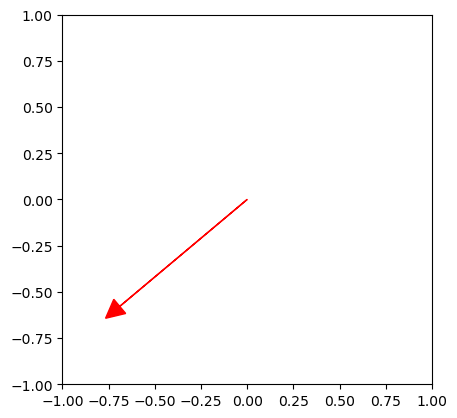

In [13]:

x0_length,y0_length = get_arrow_lengths(first_azimuth)

plt.arrow(0, 0, x0_length, y0_length,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='red' )    
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<font color=goldenrod>**_Code for you to write_**</font>

Create a new plot like the one above and use the ```get_arrow_length``` function and add the following:
1. a green arrow pointed north (azimuth of 0)
2. an orange one pointed southeast (azimuth of 135)
3. the red arrow pointed southwest (azimuth of first azimuth, like above)

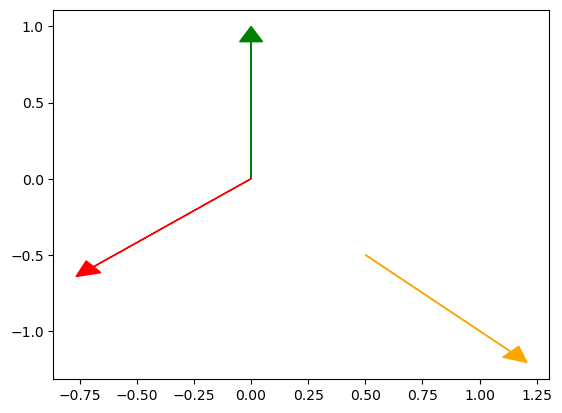

In [28]:
arrow1 = get_arrow_lengths(0) 
arrow2 = get_arrow_lengths(135)
arrow3 = get_arrow_lengths(first_azimuth)

plt.arrow(0, 0, arrow1[0], arrow1[1],length_includes_head=True,head_width=0.1, head_length=0.1,color='green' ) 
plt.arrow(.5, -.5, arrow2[0], arrow2[1],length_includes_head=True,head_width=0.1, head_length=0.1,color='orange' ) 
plt.arrow(0, 0, arrow3[0], arrow3[1],length_includes_head=True,head_width=0.1, head_length=0.1,color='red' ) 

plt.show()


## Calculate the x length and y length associated with the unit vector of each azimuth

If we want to plot the directions on a map as arrows, we will need to know their x and y lengths.

<font color=goldenrod>**_Code for you to write_**</font>
- Use `get_arrow_lengths` to calculate x- and y-lengths for all ice_directions at the same time (no loop needed)
- Save these as new columns `x_length` and `y_length`

In [15]:
ice_directions.head()

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Prjctn,src_Author,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref
0,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.543547,48.336583,230,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"
1,Drumlinoid or fluting,Bidirectional,092B,092B06,NAD 83,Geographic,-123.394746,48.371947,39,NaN,...,Lambert Conformal Conic,"Fulton, R.J.",1995,Surficial materials of Canada,Geological Survey of Canada,A Series Map,1880A,5000000,e00,"Fulton, 1995"
2,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.507599,48.382182,190,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"
3,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.494612,48.396594,188,NaN,...,Universal Transverse Mercator Zone 10 North,"Blyth, H.E. and Rutter, N.W.",1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993"
4,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.496605,48.400974,202,NaN,...,Universal Transverse Mercator Zone 10 North,"Blyth, H.E. and Rutter, N.W.",1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993"


In [16]:
ice_directions["x_length"],ice_directions["y_length"]=get_arrow_lengths(ice_directions["Azimuth"])
ice_directions

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref,x_length,y_length
0,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.543547,48.336583,230,NaN,...,1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918",-0.766044,-0.642788
1,Drumlinoid or fluting,Bidirectional,092B,092B06,NAD 83,Geographic,-123.394746,48.371947,39,NaN,...,1995,Surficial materials of Canada,Geological Survey of Canada,A Series Map,1880A,5000000,e00,"Fulton, 1995",0.629320,0.777146
2,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.507599,48.382182,190,NaN,...,1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918",-0.173648,-0.984808
3,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.494612,48.396594,188,NaN,...,1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993",-0.139173,-0.990268
4,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.496605,48.400974,202,NaN,...,1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993",-0.374607,-0.927184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151339,Drumlin,Unidirectional,117D,117D04,NAD 83,Geographic,-139.247896,69.218716,133,NaN,...,2010,Digital landform patterns for glaciated region...,Geological Survey of Canada,Open File,6190,250000,shapefile,"Shaw et al., 2010",0.731354,-0.681998
151340,Drumlin,Unidirectional,117D,117D04,NAD 83,Geographic,-139.227715,69.221691,137,NaN,...,2010,Digital landform patterns for glaciated region...,Geological Survey of Canada,Open File,6190,250000,shapefile,"Shaw et al., 2010",0.681998,-0.731354
151341,Drumlin,Unidirectional,117D,117D04,NAD 83,Geographic,-139.164344,69.234965,124,NaN,...,2010,Digital landform patterns for glaciated region...,Geological Survey of Canada,Open File,6190,250000,shapefile,"Shaw et al., 2010",0.829038,-0.559193
151342,Drumlin,Unidirectional,117D,117D05,NAD 83,Geographic,-139.324241,69.250674,133,NaN,...,2010,Digital landform patterns for glaciated region...,Geological Survey of Canada,Open File,6190,250000,shapefile,"Shaw et al., 2010",0.731354,-0.681998


## Plot the data on a map

To plot the directional data on a map we will use `plt.quiver`. Take a look at the docstring and work out how to use it.

In [17]:
plt.quiver?

Signature: plt.quiver(*args, data=None, **kwargs) -> 'Quiver'
Docstring:
Plot a 2D field of arrows.

Call signature::

  quiver([X, Y], U, V, [C], /, **kwargs)

*X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
*C* optionally sets the color. The arguments *X*, *Y*, *U*, *V*, *C* are
positional-only.

**Arrow length**

The default settings auto-scales the length of the arrows to a reasonable size.
To change this behavior see the *scale* and *scale_units* parameters.

**Arrow shape**

The arrow shape is determined by *width*, *headwidth*, *headlength* and
*headaxislength*. See the notes below.

**Arrow styling**

Each arrow is internally represented by a filled polygon with a default edge
linewidth of 0. As a result, an arrow is rather a filled area, not a line with
a head, and `.PolyCollection` properties like *linewidth*, *edgecolor*,
*facecolor*, etc. act accordingly.


Parameters
----------
X, Y : 1D or 2D array-like, optional
    The x and y coordinates 

<font color=goldenrod>**_Code for you to write_**</font>
- Finish the plt.quiver command to plot the ice_directions at the location that they were measured

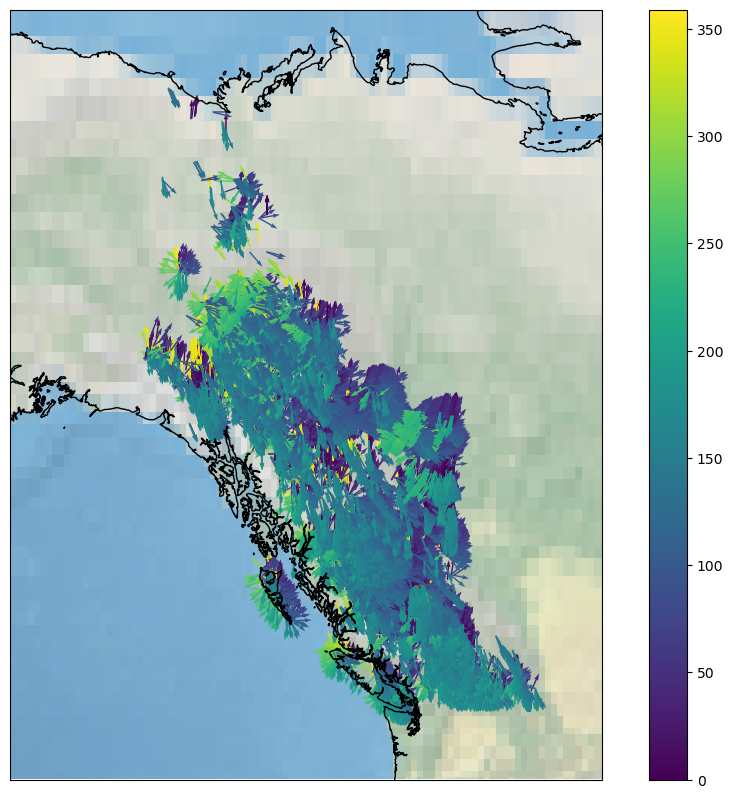

In [31]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.Mercator()) 
ax.stock_img()

ax.set_extent([-150, -110, 45, 70])
ax.coastlines('10m')

plt.quiver(ice_directions['Long'], ice_directions['Lat'], ice_directions['x_length'], ice_directions['y_length']
           , ice_directions['Azimuth'],scale=30,transform=ccrs.PlateCarree(),color='purple')
plt.colorbar()
plt.show()

## Subsample the data

It is awesome that there are so many datapoints, but it makes it hard to see what the directions are. Let's take a subsample of the data:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

We can use the pandas function ```.sample``` to do so specifying how many samples. In this case, we will want ```replace=False``` so that we don't sample the same datapoint twice.

Let's grab 1000 samples and plot them. We could be even more clever and develop a function that sampled with spatial awareness, **i.e. samped uniformly in space rather than randomly**, but for now, let's sample 1000 data points and then plot them on the same map.

The `.sample` method takes **arguments** of `n` which is the number of samples to take, and `replace=` which can be `True` or `False` if we want to be able to take the same sample multiple times or only once.

<font color=goldenrod>**_Code for you to write_**</font>
- Use `.sample`, `n` of 1000, and `replace` of False to create a subsample of the `ice_directions`
- Save this as `ice_directions_subsample`

In [19]:
ice_directions_subsample=ice_directions.sample(n=1000, replace=False)

<font color=goldenrod>**_Code for you to write_**</font>
- Plot the resampled data

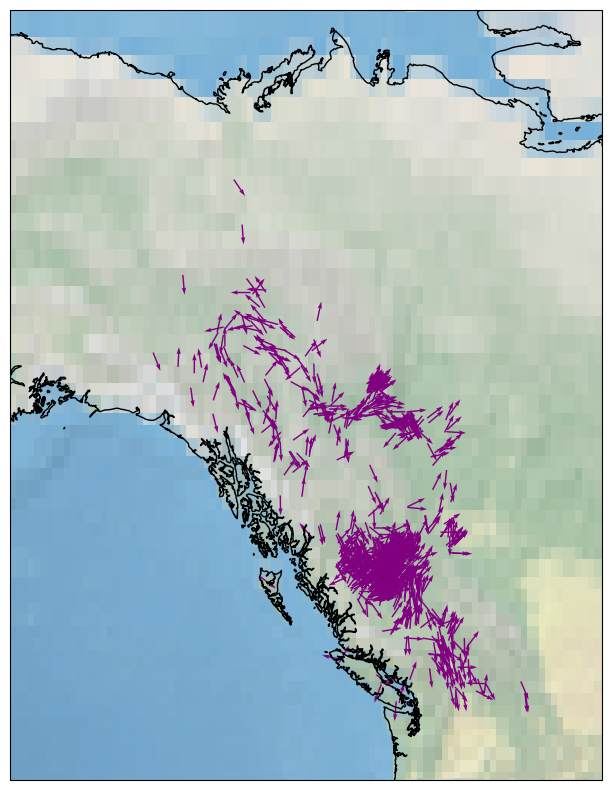

In [20]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.Mercator()) 
ax.stock_img()

ax.set_extent([-150, -110, 45, 70])
ax.coastlines('10m')

plt.quiver(ice_directions_subsample['Long'], ice_directions_subsample['Lat'], ice_directions_subsample['x_length'], ice_directions_subsample['y_length'],scale=30,transform=ccrs.PlateCarree(),color='purple')
plt.show()

Another way to visualize all these data on a map would be to change their color based on direction.

<font color=goldenrod>**_Code for you to write_**</font>

Make a data frame called ```ice_directions_west``` for flow directions that have an **'Azimuth' greater than or equal to 180** and a data frame called ```ice_directions_east``` for flow directions that have an **'Azimuth' less than 180.**

In [32]:
ice_directions_west = ice_directions[ice_directions['Azimuth']>=180].sample(n=1000, replace=False)
ice_directions_east = ice_directions[ice_directions['Azimuth']<180].sample(n=1000, replace=False)

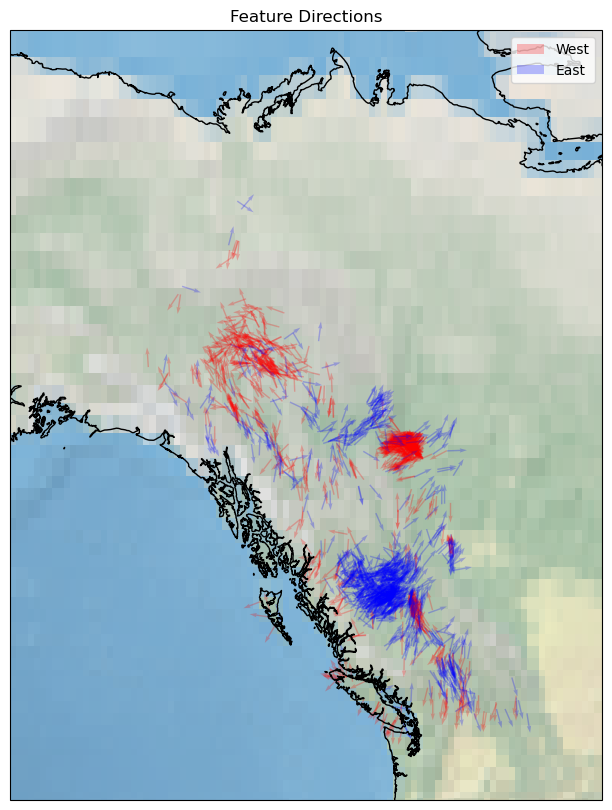

In [33]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.Mercator()) 
ax.stock_img()

ax.set_extent([-150, -110, 45, 70])
ax.coastlines('10m')

#West Data
plt.quiver(ice_directions_west['Long'],ice_directions_west['Lat'],ice_directions_west['x_length'],ice_directions_west['y_length']
           ,scale=30,transform=ccrs.PlateCarree(),color='red', alpha=0.25, label='West')
#East Data
plt.quiver(ice_directions_east['Long'],ice_directions_east['Lat'],ice_directions_east['x_length'],ice_directions_east['y_length']
           ,scale=30,transform=ccrs.PlateCarree(),color='blue', alpha=0.25, label='East')

plt.title("Feature Directions")
plt.legend()

plt.show()

It is easier to see some of the directions, but it would be nice to summarize there orientation. We have summarized data using histograms before so let's go ahead and do that.

## Visualizing the directions

<font color=goldenrod>**_Code for you to write_**</font>
To start with, just plot a histogram of the `Azimuth`

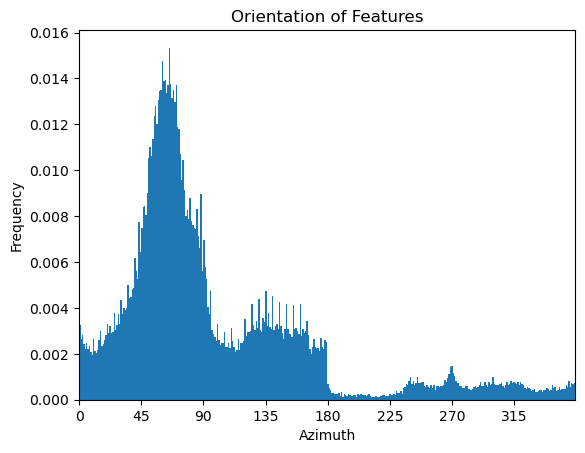

In [34]:
plt.hist(ice_directions["Azimuth"], density=True, bins=360)
plt.title("Orientation of Features")
plt.xlabel("Azimuth")
plt.ylabel("Frequency")
plt.xlim(0,359)
plt.xticks(range(0,360,45))
plt.show()

<font color=red>**_Discussion Question_**</font>

Why are histograms not great for visualizing directional data?

### Rose diagrams

*Text modified from Lisa Tauxe's materials for her Python for Earth Science Students course: https://github.com/ltauxe/Python-for-Earth-Science-Students*

As Earth scientists, we like to make plots that convey the most information with the least amount of effort for the viewer.  2D directional data are much better represented as 'rose diagrams', which are really just histograms plotted around a circle. They are also known as _polar_ projections as they could be used to make a map of the Earth looking down at one of the poles.  

We will follow these steps: 

- For rose diagrams, we will create a  plot instance (called ```fig```) with the ```plt.subplot()``` function.  We make it a _polar_ plot by setting the ```polar``` keyword to ```True```. 
- The _polar_ type of subplot has funny coordinates set as default, funny to an Earth scientist at least.  The orientations go around counterclockwise instead of clockwise (like map directions). To make it seem more normal for Earth science data,  we have to switch around the directions to geographic coordinates.  We do this with the **fig.set_theta_direction(-1)** function where the '-1' tells **matplotlib** that we want the numbers to go around clockwise, instead of the default (which for some unknown reason goes counter clockwise).  
- We also have to put '0' at the top of the diagram (because it is 'North' in Earth science).  We do that with the ```fig.set_theta_zero_location('N')``` call, which tells ```matplotlib``` to put 0 on top (instead of on the right side which is the default).  
-  We have to define some bins, sort of like histograms but around azimuthal circle, and count up how many directions are in each bin.  We will use a bin size of 10$^{\circ}$.  Fortunately, ```plt.hist()``` will count up the number of directional data in each bin for us! Usually we just use ```plt.hist()``` to make the plot, but we can also have it return the bins and the number in each bin.
- We will use the  plot function **plt.bar()** which normally makes bar charts, but will make rose diagrams if the plot is _polar_.
- Finally, we will plot the data on the figure instance. 

Let's modify the histogram and use `plt.hist()` to count up the number in each bin for each set of striations. **If we assign the output of `plt.hist()` to variables, we can use them for other plotting.**

<font color=goldenrod>**_Code for you to write_**</font>
- Add a call of plt.hist that takes `Azimuth` and `binarray` as arguments
- It will produce three outputs `azimuth_counts`, `azimuth_bins`, `patches`
- Save the output of plt.hist as the variables above

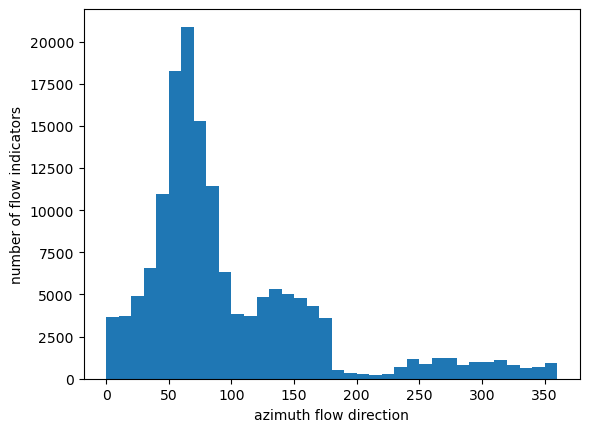

In [39]:
width = 10 # width of the azimuthal bins
binarray = np.arange(0,360+width,width) # make an array to use for bins in plt.hist

#plt.hist here
azimuth_counts, azimuth_bins, patches = plt.hist(ice_directions['Azimuth'], bins=binarray)
#plt.hist here

plt.xlabel('azimuth flow direction')
plt.ylabel('number of flow indicators')
plt.show()

We're going to use `plt.bar()` to create a rose diagram, which is polar plot of the histogram values. `plt.bar()` needs:
1. an array of counths, which are the histogram values
2. an array of angles (in radians), the same length as our counts array
3. an array of `widths` of each bin (in radians), the same same length as our counts array

We need to delete the last bin from binarray and convert our arrays into radians.

In [40]:
bins = binarray[0:-1] # delete the last bin
thetas = np.radians(bins) # convert the binarray from degrees to radians.  
widths = np.radians(np.ones(len(thetas))*width) # make the widths array
print (bins)
print (thetas)
print (widths)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350]
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.44346095 2.61799388 2.7925268  2.96705973
 3.14159265 3.31612558 3.4906585  3.66519143 3.83972435 4.01425728
 4.1887902  4.36332313 4.53785606 4.71238898 4.88692191 5.06145483
 5.23598776 5.41052068 5.58505361 5.75958653 5.93411946 6.10865238]
[0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293]


Now we are ready to make the plot.  

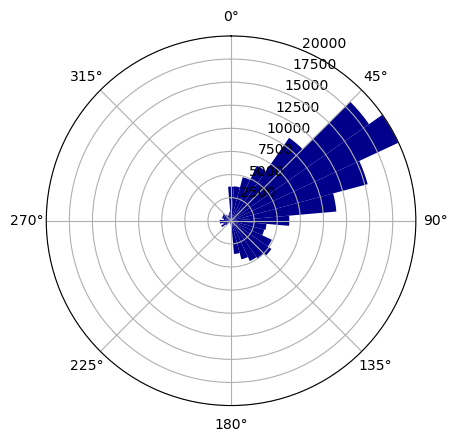

In [42]:
# make the figure instance
fig = plt.subplot(111, polar=True) # Specify polar axes

# set the coordinates the way we want them
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
fig.set_ylim([0,20000])

# use the polar "bar" plot.   
fig.bar(thetas, azimuth_counts, width=widths, bottom=0, color='darkblue')
plt.show()

<font color=red>**_Discussion Question_**</font>
What direction was the Cordilleran ice sheet was dominantly flowing?


<img src="./figures/Cordilleran-and-Laurentide-Ice-Sheets.png" width = 600>

But the Cordilleran ice sheet ice sheet is more complicated than that and has zones with different dynamics. Let's zoom-in on Vancouver Island -- west of Vancouver where the lovely coastal city of Victoria is located.

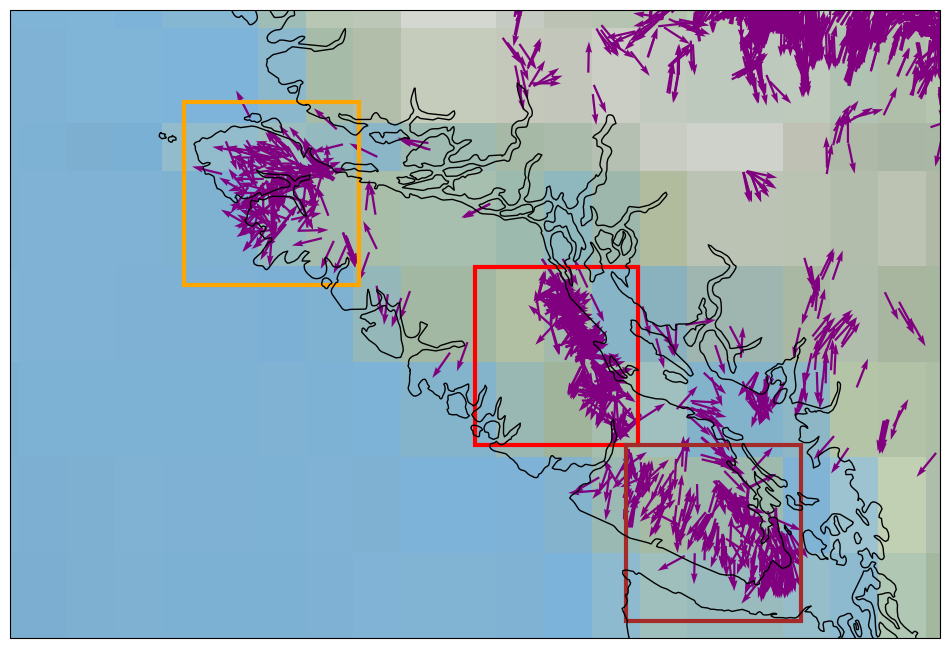

In [43]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.Mercator()) 
ax.stock_img()

ax.set_extent([-130, -122, 48, 51.5])
ax.coastlines('10m')

plt.quiver(np.array(ice_directions['Long']),np.array(ice_directions['Lat']),
           np.array(ice_directions['x_length']),np.array(ice_directions['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='purple')

ax.add_patch(mpatches.Rectangle(xy=[-128.5, 50], width=1.5, height=1,
                                    edgecolor='orange',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))

ax.add_patch(mpatches.Rectangle(xy=[-126, 49.1], width=1.4, height=1,
                                    edgecolor='red',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))

ax.add_patch(mpatches.Rectangle(xy=[-124.7, 48.1], width=1.5, height=1,
                                    edgecolor='brown',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))
                      
plt.show()

In the map above, I have grouped the data into three zones (north, central and south). 

<font color=goldenrod>**_Code for you to write_**</font>

Filter the dataframe to make separate Vancouver Island north, central and south dataframes.

The lat and long ranges of each of region are:

`ice_directions_VI_n`: Long -128.5 to -127.0
                     Lat 50.0 to 51.0

`ice_directions_VI_c`: Long -126.0 to -124.6
                     Lat 49.1 to 50.1

`ice_directions_VI_s`: Long -124.7 to -123.2
                     Lat 48.1 to 49.1

In [48]:
ice_directions_VI_n = ice_directions[(ice_directions['Lat']>=50)&(ice_directions['Lat']<=51)&(ice_directions['Long']>=-128.5)&(ice_directions['Long']<=-127)]
ice_directions_VI_c = ice_directions[(ice_directions['Lat']>=49.1)&(ice_directions['Lat']<=50.1)&(ice_directions['Long']>=-126)&(ice_directions['Long']<=-124.6)]
ice_directions_VI_s = ice_directions[(ice_directions['Lat']>=48.1)&(ice_directions['Lat']<=49.1)&(ice_directions['Long']>=-124.7)&(ice_directions['Long']<=-123.2)]


In [62]:
bounding_box = [-128.5,-127,50,51]#[]
def box_mask_df(df, lat_col, lon_col, box):
    pass
    # sort longs
    longs = box[0:1]
    # sort lats
    lats = box[2:3]
    
    mask_df = df[df['lon']]
    return mask_df

In [63]:
bounding_box = [-128.5,-127,50,51] #[]
print(bounding_box.sort())

None


Let's plot them different colors so that we make sure the filtering worked. 

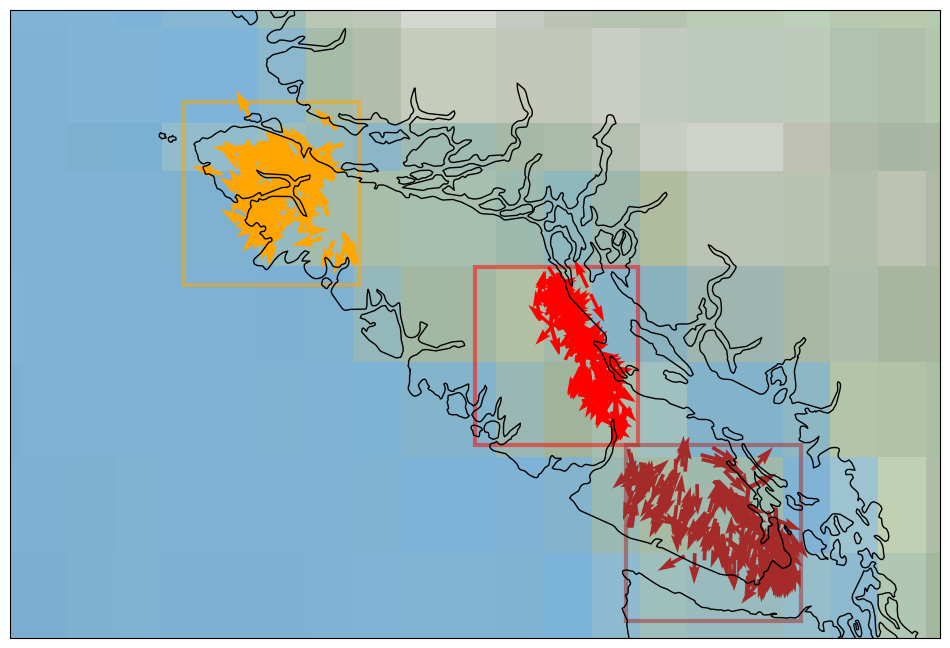

In [64]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.Mercator()) 
ax.stock_img()
#---
#tiler = Stamen('terrain-background')
#mercator = tiler.crs
#ax = plt.axes(projection=mercator)
#ax.add_image(tiler, 4)
#---
ax.set_extent([-130, -122, 48, 51.5])
ax.coastlines('10m')

plt.quiver(np.array(ice_directions_VI_n['Long']),np.array(ice_directions_VI_n['Lat']),
           np.array(ice_directions_VI_n['x_length']),np.array(ice_directions_VI_n['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='orange')

plt.quiver(np.array(ice_directions_VI_c['Long']),np.array(ice_directions_VI_c['Lat']),
           np.array(ice_directions_VI_c['x_length']),np.array(ice_directions_VI_c['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='red')

plt.quiver(np.array(ice_directions_VI_s['Long']),np.array(ice_directions_VI_s['Lat']),
           np.array(ice_directions_VI_s['x_length']),np.array(ice_directions_VI_s['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='brown')

ax.add_patch(mpatches.Rectangle(xy=[-128.5, 50], width=1.5, height=1, alpha=.5,
                                    edgecolor='orange',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))

ax.add_patch(mpatches.Rectangle(xy=[-126, 49.1], width=1.4, height=1, alpha=.5,
                                    edgecolor='red',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))

ax.add_patch(mpatches.Rectangle(xy=[-124.7, 48.1], width=1.5, height=1, alpha=.5,
                                    edgecolor='brown',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))
                      
plt.show()

Since we're going to make these rose diagram plots several times more, we can define a function to make this faster.

Look at the arguments we're allowing the function to take:
- azimuths
- color
- bin_width (with a default of 10)
- title
- a mean_direction (with a default of None)

In [65]:
def make_rose_diagram(azimuths,color='black',bin_width=10,title='',mean_direction=None):
    binarray = np.arange(0,360+bin_width,bin_width) # make an array to use for bins in plt.hist
    azimuth_counts, azimuth_bins, patches = plt.hist(azimuths,bins=binarray) # get back the counts
    plt.clf()
    bins = binarray[0:-1] # delete the last bin
    thetas = np.radians(bins) # convert the binarray to radians.  
    widths = np.radians(np.ones(len(thetas))*bin_width) # make the widths array

    fig = plt.subplot(111, polar=True) # Specify polar axes
    fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
    fig.set_theta_zero_location("N") # Specify 0-degrees as North
    plt.bar(thetas, azimuth_counts, width=widths, bottom=0, color=color)
    if mean_direction != None:
        plt.bar(np.radians(mean_direction), np.max(azimuth_counts), width=0.01,bottom=0, color='black')
    plt.title(title)
    plt.show()

<font color=goldenrod>**_Code for you to write_**</font>
- Use `make_rose_diagram` to create a rose diagram for ice_directions_VI_n
- and ice_directions_VI_c
- and ice_directions_VI_s
- give them appropriate titles
- plot them in different colours

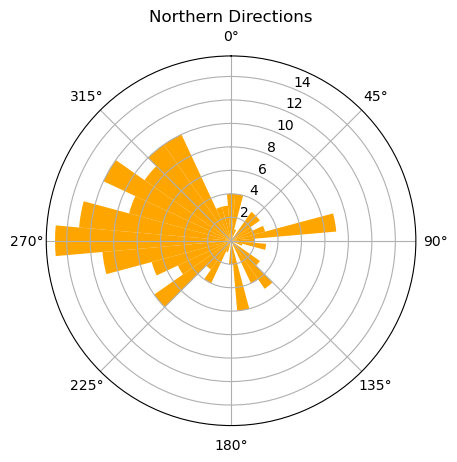

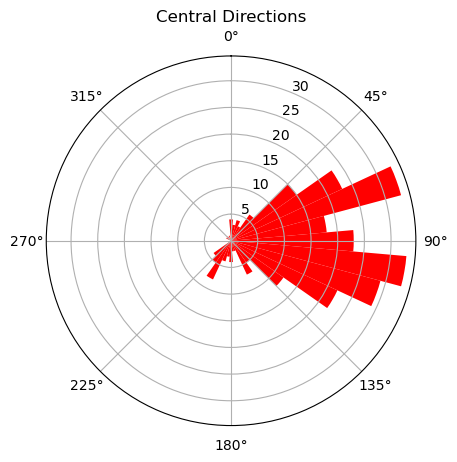

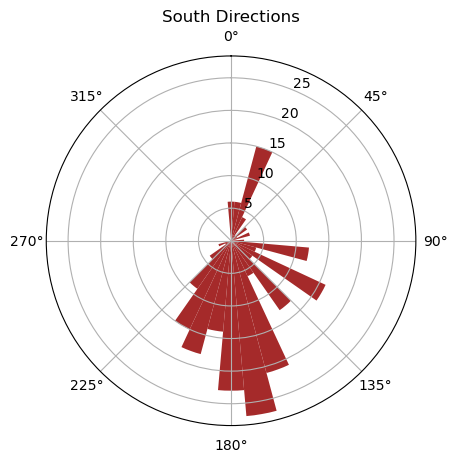

In [72]:

make_rose_diagram(ice_directions_VI_n['Azimuth'], title='Northern Directions', color='orange')
make_rose_diagram(ice_directions_VI_c['Azimuth'], title='Central Directions', color='red')
make_rose_diagram(ice_directions_VI_s['Azimuth'], title='South Directions', color='brown')

### Are the central directions 180º away from the northern directions?

On average, are the azimuths in the two regions, the central and northern, antipodal to each either, **i.e. 180 degrees apart**?

First, we need to calculate a mean direction. To calculate a mean direction of directional data, we can't just calculate the arithmetic mean. **This doesn't work for directional data**

In [73]:
azimuth_1 = 6
azimuth_2 = 351

np.mean([azimuth_1,azimuth_2])

np.float64(178.5)

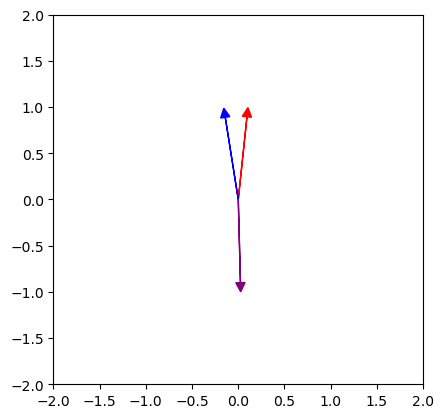

In [74]:
x_length_1,y_length_1 = get_arrow_lengths(azimuth_1)
x_length_2,y_length_2 = get_arrow_lengths(azimuth_2)
x_length_mn,y_length_mn = get_arrow_lengths(np.mean([azimuth_1,azimuth_2]))

plt.arrow(0, 0, x_length_1, y_length_1,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='red')   
plt.arrow(0,0,x_length_2,y_length_2,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='blue')  
plt.arrow(0, 0,x_length_mn,y_length_mn,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='purple')  
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

That is a pretty ridiculous answer as both of these azimuths are pointed roughly north.

So how do we actually get the mean azimuth direction?

We sum together the x and y componenents independently.

<img src="./figures/resultant_vector.png" width = 300>

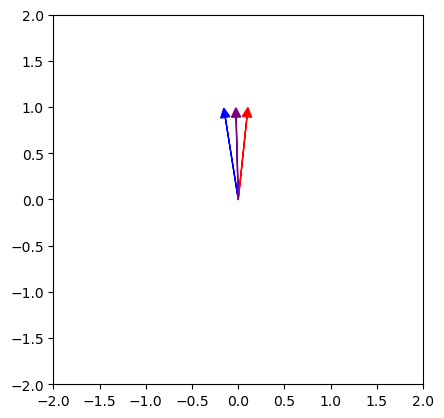

In [75]:
x_length_1,y_length_1 = get_arrow_lengths(azimuth_1)
x_length_2,y_length_2 = get_arrow_lengths(azimuth_2)
x_length_mn = np.mean([x_length_1,x_length_2])
y_length_mn = np.mean([y_length_1,y_length_2])

plt.arrow(0, 0, x_length_1, y_length_1,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='red')   
plt.arrow(0,0,x_length_2,y_length_2,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='blue')   
plt.arrow(0, 0,x_length_mn,y_length_mn,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='purple')   

plt.ylim(-2,2)
plt.xlim(-2,2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We can calculate the x_total and y_total as we have previously calculated the x_length and y_length for every data point:

In [76]:
x_total_VI_n = np.sum(ice_directions_VI_n['x_length'])
y_total_VI_n = np.sum(ice_directions_VI_n['y_length'])
print(x_total_VI_n,y_total_VI_n)

-64.33078653746497 23.783471333231315


To convert from cartesian (x and y) back to polar coordinates, we use trigonometry again, Tan theta =y/x

<img src="./figures/tangent_unit_circle.jpg" width = 600>

If we have y/x and we want to find theta, then we need to use tan^-1, or "arctan". 

<img src="./figures/arctan.jpg" width = 600>

**Arctan is only defined between -pi/2 and +pi/2 radians, or -90 and 90 degrees.** So when we use arctan to calculate the mean angular direction we have to be careful about the signs of x and y.

For example the x,y vectors (1, 2) and (-1, -2) are in opposite directions

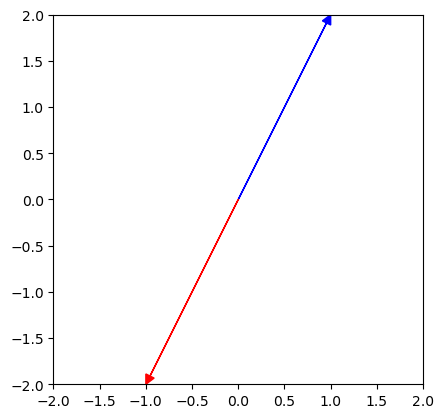

In [77]:
plt.arrow(0, 0, 1, 2, length_includes_head=True,
         head_width=0.1, head_length=0.1,color='blue')
plt.arrow(0, 0, -1, -2,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='red')   
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

But arctan 1/2 is the same as arctan -1/-2

In [78]:
print (np.rad2deg(np.arctan(1/2)))
print (np.rad2deg(np.arctan(-1/-2)))

26.56505117707799
26.56505117707799


But if we're careful about the signs of the x and the y, we can define a function to calculate the mean angular direction using arctan.

In [79]:
def mean_angular_direction(x_total,y_total):
    if (x_total >= 0) & (y_total >= 0):
        angle = np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total > 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total > 0):
        angle = 360+np.rad2deg(np.arctan(x_total/y_total))
    return(angle)

In [80]:
northern_mean = mean_angular_direction(x_total_VI_n,y_total_VI_n)
northern_mean

np.float64(290.2896506801923)

Alternatively, we can use the function `arctan2` which takes arguments of both **x** and **y** and carries the signs for us. Since `arctan2` works in the -180 to 180 degree convention we add 360 degrees to make it equivalent to our `mean_angular_direction` function.

In [81]:
(np.rad2deg(np.arctan2(x_total_VI_n,y_total_VI_n))+360)

np.float64(290.2896506801923)

Now we can plot the mean direction on the rose diagram using the argument **mean_direction**

<font color=goldenrod>**_Code for you to write_**</font>
- Use the `mean_direction` argument of `make_rose_diagram` to add the mean direction

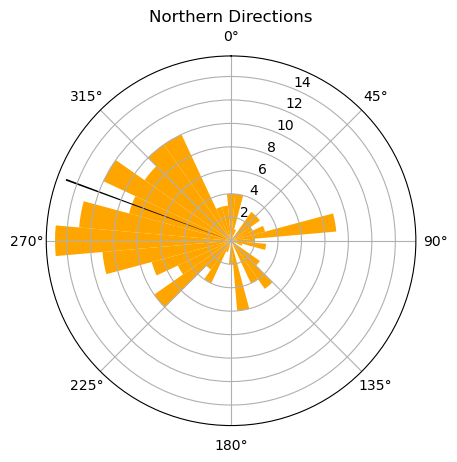

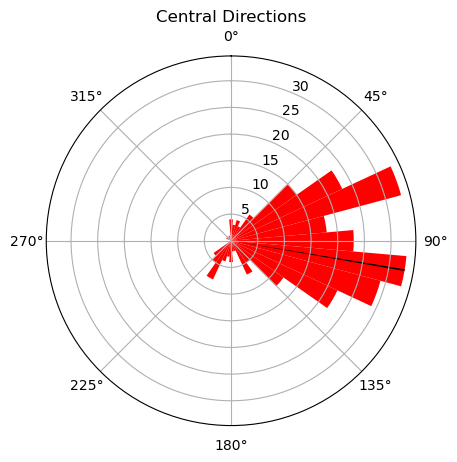

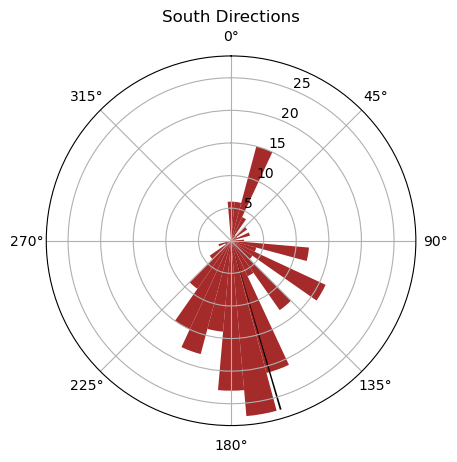

In [88]:
x_total_VI_n = np.sum(ice_directions_VI_n['x_length'])
y_total_VI_n = np.sum(ice_directions_VI_n['y_length'])
make_rose_diagram(ice_directions_VI_n['Azimuth'], title='Northern Directions', color='orange', mean_direction=mean_angular_direction(x_total_VI_n,y_total_VI_n))

x_total_VI_c = np.sum(ice_directions_VI_c['x_length'])
y_total_VI_c = np.sum(ice_directions_VI_c['y_length'])
make_rose_diagram(ice_directions_VI_c['Azimuth'], title='Central Directions', color='red', mean_direction=mean_angular_direction(x_total_VI_c,y_total_VI_c))

x_total_VI_s = np.sum(ice_directions_VI_s['x_length'])
y_total_VI_s = np.sum(ice_directions_VI_s['y_length'])
make_rose_diagram(ice_directions_VI_s['Azimuth'], title='South Directions', color='brown', mean_direction=mean_angular_direction(x_total_VI_s,y_total_VI_s))

<font color=goldenrod>**_Code for you to write_**</font>

Calculate the x_total and y_total for the central VI data and then the central VI mean ice flow directions. Plot the observed directions and their mean on a rose diagram.

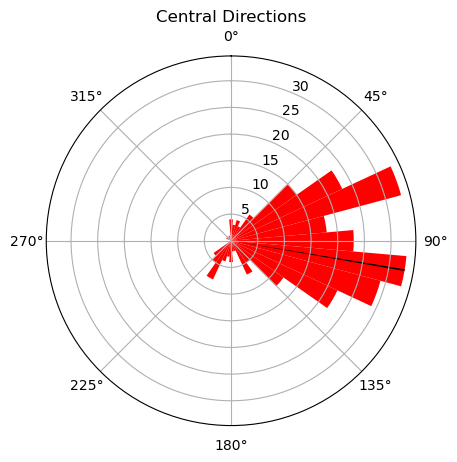

In [94]:
x_total_VI_c = np.sum(ice_directions_VI_c['x_length'])
y_total_VI_c = np.sum(ice_directions_VI_c['y_length'])
central_mean = mean_angular_direction(x_total_VI_c,y_total_VI_c)

make_rose_diagram(ice_directions_VI_c['Azimuth'], title='Central Directions', color='red', mean_direction=mean_angular_direction(x_total_VI_c,y_total_VI_c))


## Are the central Victoria and northern Victoria ice flow directions antipodal to one another?

In [95]:
print(northern_mean)

290.2896506801923


In [96]:
print(central_mean+180)

279.6137208886106


In [97]:
central_mean+180 == northern_mean

np.False_

### How well do we know the mean directions? 

But there is scatter in the data. How well do we know the mean directions? 

If we were assuming a distribution, we could calculate a confidence interval (a standard deviation for example), but we don't know what the distribution can be. We can use the data set itself as an approximation of the population and resampling from it using a statistical technique called [the bootstrap](https://www.inferentialthinking.com/chapters/13/2/Bootstrap.html) calculating the mean each time for a large number of resamples.

We can again use the pandas function ```.sample``` to do the resampling. In this case, we will want `n` to be set to be the size of dataset and ```replace=True```.

<font color=goldenrod>**Code for you to write**</font>

Write a code that bootstrap resamples the northern Victoria ice directions and calculates the mean angle each time.

Things that we will need to run a bootstrap:
1. Prepare a list to save answers to
2. Loop to run multiple samples (use 10000 samples)
3. Resample the original `ice_directions_VI_n` dataframe, with `n`= the length of the data frame with `replace=True`
4. Calculate the sum of the x and y variables for each sample
5. Calclate the mean angle from the sums each sample
6. A variable to append the mean angle to

In [126]:
north_mean_angles = []

for rep in range(1,10000,1):
    ice_directions_VI_n_SAMPLE =ice_directions_VI_n.sample(n=len(ice_directions_VI_n), replace=True)
    x_total = np.sum(ice_directions_VI_n_SAMPLE['x_length'])
    y_total = np.sum(ice_directions_VI_n_SAMPLE['y_length'])
    resampled_mean = mean_angular_direction(x_total,y_total)
    north_mean_angles.append(resampled_mean)


<font color=goldenrod>**Code for you to write**</font>

Repeat for the **antipode** of central directions, **i.e. central_mean+180**.

In [129]:
central_mean_angles = []

for rep in range(1,10000,1):
    ice_directions_VI_c_SAMPLE =ice_directions_VI_c.sample(n=len(ice_directions_VI_n), replace=True)
    x_total = np.sum(ice_directions_VI_c_SAMPLE['x_length'])
    y_total = np.sum(ice_directions_VI_c_SAMPLE['y_length'])
    resampled_mean = mean_angular_direction(x_total,y_total)
    central_mean_angles.append(resampled_mean+180)

Now we can plot a histogram of the mean resampled directions and their 95% percent confidence intervals. To plot the the confidence interval we'll add veritcal lines (with `plt.axvline()`) at the 2.5 and 97.5 percentiles (computed for example: `x=np.percentile(north_mean_angles,2.5)`).

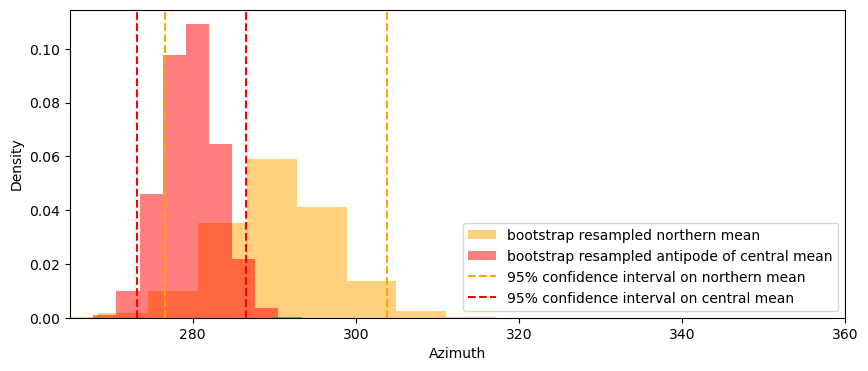

In [130]:
plt.figure(figsize=(10,4))
plt.hist(north_mean_angles,alpha=0.5,density=True,color='orange',label='bootstrap resampled northern mean')
plt.hist(central_mean_angles,alpha=0.5,density=True,color='red',label='bootstrap resampled antipode of central mean')
plt.axvline(x=np.percentile(north_mean_angles,2.5),linestyle='--',color='orange',label='95% confidence interval on northern mean')
plt.axvline(x=np.percentile(north_mean_angles,97.5),linestyle='--',color='orange')
plt.axvline(x=np.percentile(central_mean_angles,2.5),linestyle='--',color='red',label='95% confidence interval on central mean')
plt.axvline(x=np.percentile(central_mean_angles,97.5),linestyle='--',color='red')
plt.xlabel('Azimuth')
plt.ylabel('Density')
plt.legend(loc='lower right')
plt.xlim(265, 360)
plt.show()

<font color=red>**Question:**</font> Can we say that the northern mean and the antipode of the central mean are distinct?

**Write your answer and explain why in the box below.**

Yes, we can say that because the north distribution and the antipode of the south distribuiton overlap. 

### Turn in this notebook

Save your completed notebook and add your username to the end, e.g. W8_InClass_Ice_Sheets_**dfrost**.ipynb.